# [Python for data analysis] - Diabetes Dataset

## Data Exploration 

### Importation of all the librairies that we will use

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot
import pandas_bokeh
from pandas_profiling import ProfileReport

#for the machine learning models 
from sklearn.preprocessing import LabelEncoder

We set the bokeh output to notebook

In [2]:
output_notebook()

Loading BokehJS ...

We define a permanent style for the plot in order to have an homogenous vizualisation

In [3]:
plt.style.use('default')

In [4]:
%matplotlib inline

### Importation of the dataset

We create a dataframe by reading a csv file and importing the data

In [5]:
diabetes_df = pd.read_csv(r'../Dataset/diabetic_data.csv', sep =',', na_values="?", low_memory = False)
diabetes_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
#profile = ProfileReport(diabetes_df, title = "Diabetes dataset overview")
#profile

### Columns signification

In [7]:
info = pd.read_excel(r'../Dataset/info.xlsx')

In [8]:
info

,Feature name,Description and values,% missing
0,Encounter ID,Unique identifier of an encounter,0.00
1,Patient number,Unique identifier of a patient,0.00
2,Race,"Values: Caucasian, Asian, African American, H...",0.02
3,Gender,"Values: male, female, and unknown/invalid",0.00
4,Age,"Grouped in 10-year intervals: [0, 10), [10, 2...",0.00
5,Weight,Weight in pounds.,0.97
6,Admission type,Integer identifier corresponding to 9 distinc...,0.00
7,Discharge disposition,Integer identifier corresponding to 29 distin...,0.00
8,Admission source,Integer identifier corresponding to 21 distin...,0.00
9,Time in hospital,Integer number of days between admission and ...,0.00


### First overview

Let's use the info() method in order to observe the structure and the type of the dataframe

In [9]:
 diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_




### Counting unknown values

In [10]:
#we replace all the "?" signes by the value NaN
#diabetes_df = diabetes_df.replace('?', np.NaN)

Here we count the pourcentage of missing value in the differents columns of this dataframe

In [11]:
missing_values = diabetes_df.isna().sum() / len(diabetes_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values

,0
diag_1,0.000206
diag_2,0.003518
diag_3,0.013983
race,0.022336
payer_code,0.395574
medical_specialty,0.490822
weight,0.968585


### Dropping columns with too much missing values

With the precedent results, we eliminate the columns that have too many missing values

In [12]:
diabetes_df.drop(columns = ['weight', 'medical_specialty', 'payer_code', 'encounter_id'], inplace = True)

Some columns provide a constant value for every row, it is useless so we can eliminate them too.

In [13]:
diabetes_df.drop(columns = ['examide', 'citoglipton', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'], inplace = True)

### Dropping redundant rows

When we analysed some data in this dataset, we observed that there was some redundant rows, some rows had the same number of patient value, and sometimes the linked variables were not coherent

We also drop these rows 

In [14]:
diabetes_df.drop_duplicates(subset = "patient_nbr", keep = 'first', inplace = True)

Because of the deletion of redundant rows, some index were erased, we need to reset index

In [15]:
diabetes_df.reset_index(inplace = True, drop = True)
diabetes_df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,No,No,No,Up,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,No,No,No,Up,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,No,No,No,Steady,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,183087545,Caucasian,Female,[70-80),1,1,7,9,50,2,...,No,No,No,No,Steady,No,No,Ch,Yes,>30
71514,188574944,Other,Female,[40-50),1,1,7,14,73,6,...,No,No,No,No,Up,No,No,Ch,Yes,>30
71515,140199494,Other,Female,[60-70),1,1,7,2,46,6,...,No,No,No,No,Steady,No,No,No,Yes,>30
71516,120975314,Caucasian,Female,[80-90),1,1,7,5,76,1,...,No,No,No,No,Up,No,No,Ch,Yes,NO


### Setting the patient number as the index

In [16]:
# diabetes_df.set_index('patient_nbr', inplace = True)

### Rethink some colums format

#### Diag_1, Diag_2, Diag_3: mapping ICD9 codes with corresponding names

https://www.hindawi.com/journals/bmri/2014/781670/tab2/

We create a dictionnary in order to map the value later, this dictionnary correspond to the values found in the link above

In [17]:
map_diag_123 = {'Circulatory' : [x for x in range(390,460)]+[785],
                'Respiratory' : [x for x in range(460,519)]+[786],
                'Digestive' : [x for x in range(520,580)]+[787],
                'Diabetes' : list(set(np.linspace(250, 251, 101)) - set([251])),
                'Injury' : [x for x in range(800,1000)],
                'Musculoskeletal' : [x for x in range(710,440)],
                'Genitourinary' : [x for x in range(580,630)]+[788],
                'Neoplasms' : list(set([x for x in range(1,280)] + [780, 781, 782, 784] + [x for x in range(790, 799)] + [x for x in range(680, 709)] + [x for x in range(290, 320)]) - set([250]))}

This mapping method replace all the value by their corresponding in order to have traitable data
the numeric values in the column diag1, diag2, diag3 were too scattered, we had to regroup them by using the informations in the link above

In [18]:
def mapping_df(diabetes_df, column):
    #for the missing value
    if diabetes_df[column] is np.NaN :
        return "No data"
    value = str(diabetes_df[column])
    #there are some value that begin with a character so we treat them first to avoid errors
    if value[0] == "E" : 
        return "Other"
    elif value[0] == "V" : 
        return "Other"
    #we convert the others value to float to have a correct conversion 
    else : value = float(diabetes_df[column])
        
    #now each float value is analysed and in fonction of her category, a string value will be assigned to her
    if value in [x for x in range(390,460)]+[785] : return "Circulatory"
    elif value in [x for x in range(460,519)]+[786] : return "Respiratory"
    elif value in [x for x in range(520,580)]+[787] : return "Digestive"
    elif value in list(set(np.linspace(250, 251, 101)) - set([251])) : return "Diabetes"
    elif value in [x for x in range(800,1000)] : return "Injury"
    elif value in [x for x in range(710,740)] : return "Musculoskeletal"
    elif value in [x for x in range(580,630)]+[788] : return "Genitourinary"
    elif value in list(set([x for x in range(1,280)] + [780, 781, 782, 784] + [x for x in range(790, 799)] + [x for x in range(680, 709)] + [x for x in range(290, 320)]) - set([250])) : return "Neoplasms"
    else : return "Other"

Now we apply the mapping method to the three differents columns

In [19]:
diabetes_df['diag_1'] = diabetes_df.apply(mapping_df, axis = 1, column = 'diag_1')
diabetes_df['diag_2'] = diabetes_df.apply(mapping_df, axis = 1, column = 'diag_2')
diabetes_df['diag_3'] = diabetes_df.apply(mapping_df, axis = 1, column = 'diag_3')

Now we want to create new columns to interpret the differents diagnosis of the patient 
to do so, we first create a method that will give boolean value for the existence of the different diagnosis 

In [20]:
def value_exists(column1, column2, column3, diagnosis):
    value = []
    for i in range(len(column1)):
        if str(column1[i]) == diagnosis or str(column2[i]) == diagnosis or str(column3[i]) == diagnosis:
            #if the correspondant diagnosis is present
            value.append(True)
        else : value.append(False)
    return value

Now we map this value into new columns to interpret later with graphs and learning models

In [21]:
for diag in map_diag_123.keys():
    name = "Diag_" + str(diag)
    diabetes_df[name] = pd.Series(value_exists(diabetes_df['diag_1'], 
                                               diabetes_df['diag_2'], 
                                               diabetes_df['diag_3'], diag))

### Rethink some other columns  

We want to see what are the actual differents of the columns of this dataset 

In [22]:
diabetes_df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'change', 'diabetesMed', 'readmitted', 'Diag_Circulatory',
       'Diag_Respiratory', 'Diag_Digestive', 'Diag_Diabetes', 'Diag_Injury',
       'Diag_Musculoskeletal', 'Diag_Genitourinary', 'Diag_Neoplasms'],
      dtype='object')

We can map another columns to have a better idea of the different admission type in the later graphs

In [23]:
map_admission_type_id = {1: 'Emergency',
                             2:'Urgent',
                             3:'Elective',
                             4:'Newborn',
                             5:'Not Available',
                             6:'NULL',
                             7:'Trauma Center',
                             8 :'Not Mapped'
                            }

diabetes_df.admission_type_id = diabetes_df.admission_type_id.map(map_admission_type_id)

In [24]:
map_discharge_disposition_id = {1:"Discharged to home",
                                2:"Discharged/transferred to another short term hospital",
                                3:"Discharged/transferred to SNF",
                                4:"Discharged/transferred to ICF",
                                5:"Discharged/transferred to another type of inpatient care institution",
                                6:"Discharged/transferred to home with home health service",
                                7:"Left AMA",
                                8:"Discharged/transferred to home under care of Home IV provider",
                                9:"Admitted as an inpatient to this hospital",
                                10:"Neonate discharged to another hospital for neonatal aftercare",
                                11:"Expired",
                                12:"Still patient or expected to return for outpatient services",
                                13:"Hospice / home",
                                14:"Hospice / medical facility",
                                15:"Discharged/transferred within this institution to Medicare approved swing bed",
                                16:"Discharged/transferred/referred another institution for outpatient services",
                                17:"Discharged/transferred/referred to this institution for outpatient services",
                                18:"NULL",
                                19:"Expired at home. Medicaid only, hospice.",
                                20:"Expired in a medical facility. Medicaid only, hospice.",
                                21:"Expired, place unknown. Medicaid only, hospice.",
                                22:"Discharged/transferred to another rehab fac including rehab units of a hospital .",
                                23:"Discharged/transferred to a long term care hospital.",
                                24:"Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
                                25:"Not Mapped",
                                26:"Unknown/Invalid",
                                30:"Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
                                27:"Discharged/transferred to a federal health care facility.",
                                28:"Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
                                29:"Discharged/transferred to a Critical Access Hospital (CAH)."}

diabetes_df.discharge_disposition_id = diabetes_df.discharge_disposition_id.map(map_discharge_disposition_id)

In [25]:
map_admission_source_id = { 1:"Physician Referral",
                            2:"Clinic Referral",
                            3:"HMO Referral",
                            4:"Transfer from a hospital",
                            5:"Transfer from a Skilled Nursing Facility (SNF)",
                            6:"Transfer from another health care facility",
                            7:"Emergency Room",
                            8:"Court/Law Enforcement",
                            9:"Not Available",
                            10:"Transfer from critial access hospital",
                            11:"Normal Delivery",
                            12:"Premature Delivery",
                            13:"Sick Baby",
                            14:"Extramural Birth",
                            15:"Not Available",
                            17:"NULL",
                            18:"Transfer From Another Home Health Agency",
                            19:"Readmission to Same Home Health Agency",
                            20:"Not Mapped",
                            21:"Unknown/Invalid",
                            22:"Transfer from hospital inpt/same fac reslt in a sep claim",
                            23:"Born inside this hospital",
                            24:"Born outside this hospital",
                            25:"Transfer from Ambulatory Surgery Center",
                            26:"Transfer from Hospice"
                          }

diabetes_df.admission_source_id = diabetes_df.admission_source_id.map(map_admission_source_id)

## Data Visualization

### Correlation Matrix

In [26]:
#now we want to see some correlations between features so we 
corr = diabetes_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Diag_Circulatory,Diag_Respiratory,Diag_Digestive,Diag_Diabetes,Diag_Injury,Diag_Musculoskeletal,Diag_Genitourinary,Diag_Neoplasms
patient_nbr,1.00,-0.02,0.01,-0.02,0.02,0.09,0.06,0.09,0.23,-0.02,0.01,0.01,-0.10,0.02,0.00,0.05,0.02
time_in_hospital,-0.02,1.00,0.33,0.19,0.47,-0.01,-0.01,0.06,0.23,-0.03,0.02,0.01,-0.14,0.05,-0.02,0.05,0.05
num_lab_procedures,0.01,0.33,1.00,0.05,0.26,-0.01,0.01,0.08,0.16,-0.01,0.05,0.03,-0.07,-0.03,-0.12,0.10,0.04
num_procedures,-0.02,0.19,0.05,1.00,0.40,-0.02,-0.04,-0.02,0.09,0.15,-0.12,0.00,-0.10,0.08,0.02,-0.05,-0.16
num_medications,0.02,0.47,0.26,0.40,1.00,0.03,0.00,0.04,0.26,0.09,0.05,-0.05,-0.14,0.09,0.09,0.01,-0.11
number_outpatient,0.09,-0.01,-0.01,-0.02,0.03,1.00,0.10,0.07,0.08,-0.00,-0.01,-0.00,-0.03,-0.01,0.01,0.02,0.01
number_emergency,0.06,-0.01,0.01,-0.04,0.00,0.10,1.00,0.15,0.05,-0.03,0.01,0.01,0.01,-0.01,-0.00,0.01,0.03
number_inpatient,0.09,0.06,0.08,-0.02,0.04,0.07,0.15,1.00,0.07,0.01,0.00,-0.00,-0.03,0.01,-0.02,0.01,0.00
number_diagnoses,0.23,0.23,0.16,0.09,0.26,0.08,0.05,0.07,1.00,0.06,0.09,0.01,-0.42,0.07,-0.07,0.14,0.02
Diag_Circulatory,-0.02,-0.03,-0.01,0.15,0.09,-0.00,-0.03,0.01,0.06,1.00,-0.04,-0.19,-0.14,-0.12,-0.10,-0.13,-0.33


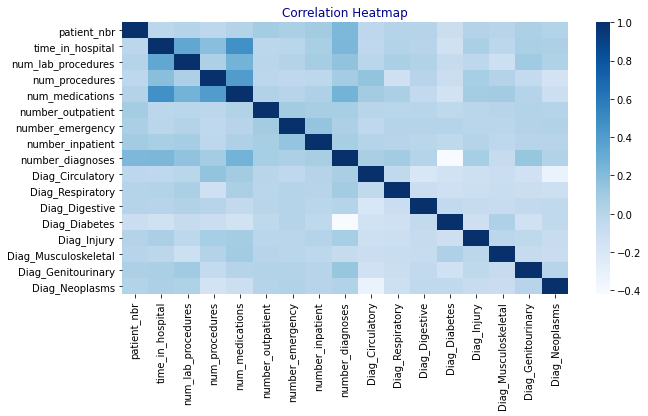

In [27]:
#another style of correlation matrix with seaborn library 
plt.figure(figsize=(10, 5))
corrM = sns.heatmap(diabetes_df.corr(), cmap = 'Blues')
corrM.set_title('Correlation Heatmap', fontdict={'fontsize':12}, color = 'darkblue' );

In [28]:
diabetes_df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'change', 'diabetesMed', 'readmitted', 'Diag_Circulatory',
       'Diag_Respiratory', 'Diag_Digestive', 'Diag_Diabetes', 'Diag_Injury',
       'Diag_Musculoskeletal', 'Diag_Genitourinary', 'Diag_Neoplasms'],
      dtype='object')

## Graph visualization

Now, using the bokeh library, we can plot some graphs, that will be more interesting with the preprocessing above

In [29]:
race = diabetes_df.groupby('race').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'Race repartition', show_figure=False)
race.xaxis.major_label_orientation = np.pi/4

gender = diabetes_df.groupby('gender').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'Gender repartition',show_figure=False)

age = diabetes_df.groupby('age').size().plot_bokeh(kind="bar", title = 'Age repartition',show_figure=False)
age.xaxis.major_label_orientation = np.pi/4

admissiontypeid = diabetes_df.groupby('admission_type_id').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'Admission_type_id repartition',show_figure=False)
admissiontypeid.xaxis.major_label_orientation = np.pi/4

dischargedispositionid = diabetes_df.groupby('discharge_disposition_id').size().sort_values(ascending=False)[0:5].plot_bokeh(kind="bar", title = 'Discharge_disposition_id repartition',show_figure=False)
#dischargedispositionid.xaxis.major_label_orientation = np.pi/4

diag1 = diabetes_df.groupby('diag_1').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'diag_1 repartition',show_figure=False)
diag1.xaxis.major_label_orientation = np.pi/4

diag2 = diabetes_df.groupby('diag_2').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'diag_2 repartition',show_figure=False)
diag2.xaxis.major_label_orientation = np.pi/4

diag3 = diabetes_df.groupby('diag_3').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'diag_3 repartition',show_figure=False)
diag3.xaxis.major_label_orientation = np.pi/4

repaglinide = diabetes_df.groupby('repaglinide').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'repaglinide repartition',show_figure=False)
repaglinide.xaxis.major_label_orientation = np.pi/4

nateglinide = diabetes_df.groupby('nateglinide').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'nateglinide repartition',show_figure=False)
nateglinide.xaxis.major_label_orientation = np.pi/4

In [30]:
grid = gridplot([[race, age, gender], [diag1, diag2, diag3], [admissiontypeid,repaglinide, nateglinide], [None, dischargedispositionid, None]], plot_width=300, plot_height=300)
show(grid)

## Machine Learning

The aim of this section is to use the diabetes dataset to train some Machine Learning models using the diabete dataset in order to predict the readmission of a patient

The actual readmitted column contains 3 different values (No, >30, <30)

Later, we will rearrange this column in order to have a binary decision to predict (Readmitted under 30 days or not)

### Preparation of the data to train and test the futurs models

In order to be able to use Machine Learning algorithms, we must have numerical values only.

Let's see which column is not numerical 

In [31]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               71518 non-null  int64 
 1   race                      69570 non-null  object
 2   gender                    71518 non-null  object
 3   age                       71518 non-null  object
 4   admission_type_id         71518 non-null  object
 5   discharge_disposition_id  71518 non-null  object
 6   admission_source_id       71518 non-null  object
 7   time_in_hospital          71518 non-null  int64 
 8   num_lab_procedures        71518 non-null  int64 
 9   num_procedures            71518 non-null  int64 
 10  num_medications           71518 non-null  int64 
 11  number_outpatient         71518 non-null  int64 
 12  number_emergency          71518 non-null  int64 
 13  number_inpatient          71518 non-null  int64 
 14  diag_1                

We can see that we have categorical (interpreted as object type here) and boolean features that needs to be transformed.

Let's begin with making a copy of our dataset

#### Building of the Machine Learning oriented dataset

To fit machine learning algorithms, we need to drop the patient nbr, this column cannot be used for training model
Then, we create a copy of the actual dataframe that will be formatted to use Machine Learning algorithms

In [32]:
diabetes_df_ml = diabetes_df.drop(columns = ['patient_nbr']).copy()

In [33]:
diabetes_df_ml.readmitted.value_counts()

NO     42985
>30    22240
<30     6293
Name: readmitted, dtype: int64

#### Dealing the column to predict

As mentionned above, the actual readmission column contains 3 different values. So the idea is to map those values towards 0 or 1.

In [34]:
map_readmitted = {"NO" : 0,
                  ">30" : 0,
                  "<30" : 1}

diabetes_df_ml.readmitted = diabetes_df.readmitted.map(map_readmitted)

#### Dealing with categorical features

Now, the goal is to transform categorical features to numeric features
We simply assign a number for each category of the feature
To do so, we use the LabelEncoder from the Sklearn library.

In [35]:
label_encoder = LabelEncoder()

diabetes_df_ml["race"] = label_encoder.fit_transform(diabetes_df_ml["race"].astype(str))
diabetes_df_ml["readmitted"] = label_encoder.fit_transform(diabetes_df_ml["readmitted"].astype(str))

for column in diabetes_df_ml.select_dtypes(include=['object']).columns:
    diabetes_df_ml[column] = label_encoder.fit_transform(diabetes_df_ml[column])
    
for column in diabetes_df_ml.select_dtypes(include=['bool']).columns:
    diabetes_df_ml[column] = label_encoder.fit_transform(diabetes_df_ml[column])

We want now to observe the dataset to see if the transformation has been successful

We carefully verify each feature

In [36]:
diabetes_df_ml[list(diabetes_df_ml.columns)[:10]]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications
0,2,0,0,2,24,9,1,41,0,1
1,2,0,1,1,1,2,3,59,0,18
2,0,0,2,1,1,2,2,11,5,13
3,2,1,3,1,1,2,2,44,1,16
4,2,1,4,1,1,2,1,51,0,8
...,...,...,...,...,...,...,...,...,...,...
71513,2,0,7,1,1,2,9,50,2,33
71514,4,0,4,1,1,2,14,73,6,26
71515,4,0,6,1,1,2,2,46,6,17
71516,2,0,8,1,1,2,5,76,1,22


In [37]:
diabetes_df_ml[list(diabetes_df_ml.columns)[10:20]]

,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin
0,0,0,0,1,7,7,1,2,2,1
1,0,0,0,6,1,6,9,2,2,1
2,2,0,1,8,1,8,6,2,2,1
3,0,0,0,6,1,0,7,2,2,1
4,0,0,0,6,6,1,5,2,2,1
...,...,...,...,...,...,...,...,...,...,...
71513,0,0,0,2,2,1,9,2,0,1
71514,0,1,0,3,3,9,9,2,1,1
71515,1,1,1,4,3,0,9,2,2,1
71516,0,1,0,6,6,6,9,2,2,1


In [38]:
diabetes_df_ml[list(diabetes_df_ml.columns)[20:30]]

,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone
0,1,1,1,1,0,1,1,0,1,1
1,1,1,1,1,0,1,1,0,1,1
2,1,1,1,1,0,2,1,0,1,1
3,1,1,1,1,0,1,1,0,1,1
4,1,1,1,1,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
71513,1,1,1,1,0,1,3,0,1,1
71514,1,1,1,1,0,2,1,0,1,1
71515,1,1,1,1,0,1,1,0,1,1
71516,1,1,1,1,0,1,1,0,1,1


In [39]:
diabetes_df_ml[list(diabetes_df_ml.columns)[30:40]]

,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
0,0,1,0,0,1,1,0,1,0,0
1,0,1,0,0,3,1,0,0,1,0
2,0,1,0,0,1,1,0,1,1,0
3,0,1,0,0,3,1,0,0,1,0
4,0,1,0,0,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
71513,0,1,0,0,2,1,0,0,1,0
71514,0,1,0,0,3,1,0,0,1,0
71515,0,1,0,0,2,1,0,1,1,0
71516,0,1,0,0,3,1,0,0,1,0


In [40]:
diabetes_df_ml[list(diabetes_df_ml.columns)[40:]]

,Diag_Circulatory,Diag_Respiratory,Diag_Digestive,Diag_Diabetes,Diag_Injury,Diag_Musculoskeletal,Diag_Genitourinary,Diag_Neoplasms
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
71513,0,0,1,1,0,0,0,0
71514,0,1,0,0,0,0,1,0
71515,1,0,0,0,1,0,1,0
71516,0,0,0,0,0,0,0,1


we can see that all the columns have numerical variables corresponding to their former category,
so the method was successful

#### Shuffling rows

We shuffle the entire dataset in order to avoid an eventual order biais

In [41]:
diabetes_df_ml = diabetes_df_ml.sample(n = len(diabetes_df_ml), random_state = 42)

#### Splitting the dataset

We import train_test_split from the sklearn library to separate our data into 2 groups in order to train our model and later verify the predictions

In [42]:
from sklearn.model_selection import train_test_split

x = diabetes_df_ml.loc[:, diabetes_df_ml.columns != 'readmitted'] # every feature except the one that we will try to predict
y = diabetes_df_ml.loc[:, 'readmitted'] # readmitted feature
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33)

#### Scaling the dataset

We scale the data to have a same basis for all the columns 

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Making predictions with Machine Learning models

The idea is to try several machine learning algorithms. 

Then, we will compare them in order to see which one provides the best predictions

#### Model 1: K-Nearest Neighbors (KNN)

We again use the sklearn library to import knn

##### Creating model

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

##### Calculating predictions

We predict the readmitted feature using knn model applied on our test data

In [45]:
y_pred = knn.predict(x_test)

##### Evaluating the performance of our model

Now we can build a confusion matrix and use the accuracy and score to have visibility on the performance of our model 

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
sc = knn.score(x_train,y_train)

We use the seaborn library to plot a beautiful confusion matrix 

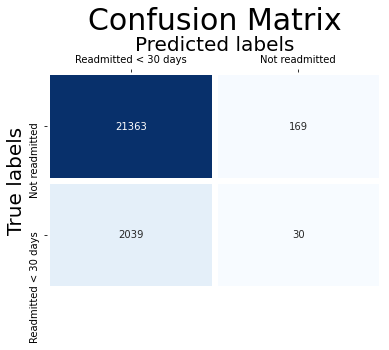

In [47]:
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", linewidths=5, cbar=False)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.xaxis.set_label_position('top');
ax.xaxis.set_ticks_position('top');

ax.set_xlabel('Predicted labels', size = 20);ax.set_ylabel('True labels', size = 20); 
ax.set_title('Confusion Matrix', size = 30); 

ax.xaxis.set_ticklabels(['Readmitted < 30 days', 'Not readmitted'])
ax.yaxis.set_ticklabels(['Not readmitted', 'Readmitted < 30 days']);

Accuracy and score of our model

In [48]:
print(" Accuracy: ", ac)
print(" Score: ", sc)

 Accuracy:  0.9064446421761789
 Score:  0.9131414737984431


We can easily create a summary of our prediction with the classification report

In [49]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     21532
           1       0.15      0.01      0.03      2069

    accuracy                           0.91     23601
   macro avg       0.53      0.50      0.49     23601
weighted avg       0.85      0.91      0.87     23601



#### Model 2: Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [51]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
sc = knn.score(x_train,y_train)

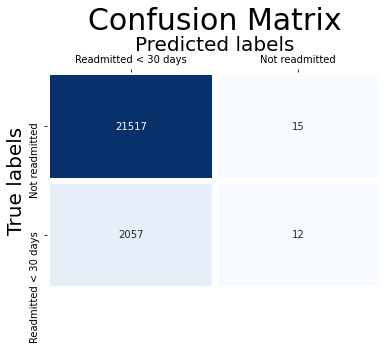

In [52]:
ax = sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", linewidths=5, cbar=False)

ax.xaxis.set_label_position('top');
ax.xaxis.set_ticks_position('top');

ax.set_xlabel('Predicted labels', size = 20);ax.set_ylabel('True labels', size = 20); 
ax.set_title('Confusion Matrix', size = 30); 

ax.xaxis.set_ticklabels(['Readmitted < 30 days', 'Not readmitted'])
ax.yaxis.set_ticklabels(['Not readmitted', 'Readmitted < 30 days']);

In [53]:
print(" Accuracy: ", ac)
print(" Score: ", sc)

 Accuracy:  0.912207109868226
 Score:  0.9131414737984431


In [55]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     21532
           1       0.44      0.01      0.01      2069

    accuracy                           0.91     23601
   macro avg       0.68      0.50      0.48     23601
weighted avg       0.87      0.91      0.87     23601



#### Model3: Linear SVC

In [56]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report 

In [57]:
lsvc  = LinearSVC( dual = False)
print(lsvc)

LinearSVC(dual=False)


In [58]:
lsvc.fit(x_train, y_train)
score = lsvc.score(x_train,y_train)
print(score)

0.9118684391760753


In [59]:
cv_score = cross_val_score(lsvc, x_train, y_train, cv = 10)
print(cv_score.mean())

0.9118475785322298


In [60]:
ypred = lsvc.predict(x_test)
cm = confusion_matrix(y_test, ypred)
print(cm)

[[21531     1]
 [ 2065     4]]


In [61]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     21532
           1       0.80      0.00      0.00      2069

    accuracy                           0.91     23601
   macro avg       0.86      0.50      0.48     23601
weighted avg       0.90      0.91      0.87     23601



## Ensemble Methods

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit( x_train, y_train)

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score( clf, x_train, y_train, cv = 5)
scores.mean()

0.9110127935929949

In [64]:
ypred3 = clf.predict(x_test)
ypred3

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, ypred3)
ac = accuracy_score(y_test,ypred3)
cm,ac

(array([[21510,    22],
        [ 2060,     9]], dtype=int64),
 0.9117833990085166)

In [66]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()
clf.fit( x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [67]:
ypred3 = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred3)
ac = accuracy_score(y_test,ypred3)
cm,ac

(array([[19335,  2197],
        [ 1766,   303]], dtype=int64),
 0.8320833862971908)

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()
clf.fit( x_train, y_train)

RandomForestClassifier(random_state=0)

In [69]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : [100, 120, 150]}
#parameters = { 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#              'max_features': ['auto', 'sqrt'],
#              'min_samples_leaf': [1, 2, 4],
#              'min_samples_split': [2, 5, 10],
#              'n_estimators': [100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
grid = GridSearchCV(RandomForestClassifier(), parameters, n_jobs = -1, cv = 5)
grid.fit(x_train,y_train)
print(grid.best_score_, grid.best_estimator_)

0.9117849617009253 RandomForestClassifier()


In [70]:
ypred3 = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred3)
ac = accuracy_score(y_test,ypred3)
cm,ac

(array([[21532,     0],
        [ 2069,     0]], dtype=int64),
 0.9123342231261388)

In [71]:
count_0 = 0
count_1 = 1 
for rows in ypred3 :
    if rows == 0 : count_0 += 1
    else : count_1 += 1
print(count_0, count_1)

23601 1


In [72]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()
clf.fit( x_train, y_train)

ExtraTreesClassifier(n_estimators=10, random_state=0)

In [73]:
ypred3 = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred3)
ac = accuracy_score(y_test,ypred3)
cm,ac

(array([[21491,    41],
        [ 2057,    12]], dtype=int64),
 0.9111054616329817)

## Drafts

In [74]:
count_0 = 0
count_1 = 1 
for rows in y_pred :
    if rows == 0 : count_0 += 1
    else : count_1 += 1
print(count_0, count_1)

23574 28


In [75]:
#now it's time to visualize some elements of our model
ks = [x for x in np.arange(2,15, 1)]
acs = []

for k in ks:
    print(k)
    knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    ac = accuracy_score(y_test,y_pred)
    acs.append(ac)
    
plt.plot(ks,acs,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

2
3


KeyboardInterrupt: 